In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, GridSearchCV

In [2]:
rand_state = 19

Load train and test data

In [3]:
hold_out = pd.read_csv('/Users/coleromanyk/Documents/GitHub/Capstone 2/hold_out_data300.csv')
train_data= pd.read_csv('/Users/coleromanyk/Documents/GitHub/Capstone 2/SMOTE300_data.csv')

In [4]:
print(train_data.info())
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Year                                     300 non-null    int64  
 1   Per Acre Emissions                       300 non-null    float64
 2   N                                        300 non-null    float64
 3   P                                        300 non-null    float64
 4   Potash                                   300 non-null    float64
 5   IN Corn Yield per Acre                   300 non-null    int64  
 6   Precipitation                            300 non-null    float64
 7   Average Temperature                      300 non-null    float64
 8   IN No Till Corn (Thousands of acres)     300 non-null    float64
 9   IN Con Till Corn (Thousands of acres)    300 non-null    float64
 10  IN Corn Cover Crop (Thousands of acres)  300 non-n

,Year,Per Acre Emissions,N,P,Potash,IN Corn Yield per Acre,Precipitation,Average Temperature,IN No Till Corn (Thousands of acres),IN Con Till Corn (Thousands of acres),IN Corn Cover Crop (Thousands of acres),Conventional Till,efficiency
0,1993,2.860590,134.0,68.0,114.0,132,50.78,52.0,1211.769,1536.438,0.0,2651.793,46.144325
1,2007,3.367331,149.0,69.0,124.0,154,36.75,55.0,1542.152,2202.153,0.0,2625.695,45.733543
2,1999,3.341237,154.0,56.0,116.0,132,32.40,54.5,1044.103,1548.732,0.0,3077.165,39.506327
3,2001,2.929382,140.0,66.0,121.0,156,41.91,54.2,1092.997,1532.988,0.0,3044.015,53.253548
4,1990,3.306718,139.0,75.0,111.0,129,50.44,54.4,479.255,824.200,0.0,4146.545,39.011486


In [5]:
print(hold_out.info())
hold_out.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Year                                     6 non-null      int64  
 1   Per Acre Emissions                       6 non-null      float64
 2   N                                        6 non-null      float64
 3   P                                        6 non-null      float64
 4   Potash                                   6 non-null      float64
 5   IN Corn Yield per Acre                   6 non-null      int64  
 6   Precipitation                            6 non-null      float64
 7   Average Temperature                      6 non-null      float64
 8   IN No Till Corn (Thousands of acres)     6 non-null      float64
 9   IN Con Till Corn (Thousands of acres)    6 non-null      float64
 10  IN Corn Cover Crop (Thousands of acres)  6 non-null   

,Year,Per Acre Emissions,N,P,Potash,IN Corn Yield per Acre,Precipitation,Average Temperature,IN No Till Corn (Thousands of acres),IN Con Till Corn (Thousands of acres),IN Corn Cover Crop (Thousands of acres),Conventional Till,efficiency
0,2006,2.758260,148.0,69.0,122.0,157,51.06,54.5,1365.257,1953.378,0.000,2061.365,56.919946
1,2017,2.802987,166.0,72.0,114.0,180,47.45,55.6,1134.432,1816.156,362.494,2249.412,64.217218
2,2005,3.096088,147.0,77.0,124.0,154,43.74,53.9,1188.362,1704.603,0.000,2877.035,49.740185
3,2008,2.802926,149.0,70.0,126.0,160,49.04,52.7,1393.276,2095.076,0.000,1971.648,57.083199
4,1994,3.331703,147.0,74.0,112.0,144,31.63,53.3,1131.817,1534.523,0.000,3293.660,43.221141


Drop components features of efficiency

In [6]:
X_train = train_data.drop(['Per Acre Emissions', 'efficiency', 'IN Corn Yield per Acre'], axis=1)
y_train = train_data['efficiency']

In [7]:
X_test = hold_out.drop(['Per Acre Emissions','efficiency','IN Corn Yield per Acre'], axis=1)
y_test = hold_out['efficiency']

Define XGBoost parameters

In [8]:
xgb_params = {"objective":"reg:squarederror"}

Define models for comparison

In [9]:
ridge = Ridge()
lasso = Lasso()
rf = RandomForestRegressor()
xg = xgb.XGBRegressor(objective='reg:squarederror')

Define scaler varible and scaler parameter for pipelines

In [10]:
scaler = StandardScaler()
scaler_param = ('Scale', scaler)

Create and run model pipelines, printing the score to compare RMSE and R^2 returned by each model

In [11]:
ridge_pipe = Pipeline([scaler_param, ('Ridge', ridge)])
lasso_pipe = Pipeline([scaler_param, ('Lasso', lasso)])
rf_pipe = Pipeline([scaler_param, ('Random Forrest', rf)])
xgb_pipe = Pipeline([scaler_param, ('XGB Regressor', xg)])

In [12]:
pipes = [ridge_pipe, lasso_pipe, rf_pipe, xgb_pipe]
for pipe in pipes:
    cv_score = cross_val_score(pipe, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
    score = (str(pipe[1]), np.mean(np.sqrt(np.abs(cv_score))))
    print(score)

('Ridge()', 2.0057402482621467)
('Lasso()', 2.554191519073999)
('RandomForestRegressor()', 0.2388542652931794)
("XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,\n             colsample_bynode=None, colsample_bytree=None, gamma=None,\n             gpu_id=None, importance_type='gain', interaction_constraints=None,\n             learning_rate=None, max_delta_step=None, max_depth=None,\n             min_child_weight=None, missing=nan, monotone_constraints=None,\n             n_estimators=100, n_jobs=None, num_parallel_tree=None,\n             random_state=None, reg_alpha=None, reg_lambda=None,\n             scale_pos_weight=None, subsample=None, tree_method=None,\n             validate_parameters=None, verbosity=None)", 0.016081008550200053)


In [13]:
pipes = [ridge_pipe, lasso_pipe, rf_pipe, xgb_pipe]
for pipe in pipes:
    cv_score = cross_val_score(pipe, X_train, y_train, scoring='r2', cv=5)
    score = (str(pipe[1]), np.mean(np.sqrt(np.abs(cv_score))))
    print(score)

('Ridge()', 0.8808323706773148)
('Lasso()', 0.64316329997135)
('RandomForestRegressor()', 0.9999425179012738)
("XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,\n             colsample_bynode=None, colsample_bytree=None, gamma=None,\n             gpu_id=None, importance_type='gain', interaction_constraints=None,\n             learning_rate=None, max_delta_step=None, max_depth=None,\n             min_child_weight=None, missing=nan, monotone_constraints=None,\n             n_estimators=100, n_jobs=None, num_parallel_tree=None,\n             random_state=None, reg_alpha=None, reg_lambda=None,\n             scale_pos_weight=None, subsample=None, tree_method=None,\n             validate_parameters=None, verbosity=None)", 0.9999999995138392)


Perform Grid and Randomized Search Params for XG Boost

In [14]:
X_scaled = scaler.fit_transform(X_train)
y_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))

In [15]:
cv_score = cross_val_score(xgb.XGBRegressor(objective="reg:squarederror"), X_scaled, y_scaled, scoring='neg_mean_squared_error', cv=5)
print(np.mean(np.sqrt(np.abs(cv_score))))

0.0002097349741801132


In [16]:
#params subsample removed 
params = {'n_estimators':range(15,51,2), 'max_depth':range(3,8), 'learning_rate':[ .1, .3, .5, .7], 'colsample_bytree':[.7, .8, .9, 1], 'reg_lambda':[.001 ,.01, 1, 10, 100]}

In [17]:
X_dmatrix = xgb.DMatrix(data=X_scaled, label=y_scaled)

In [18]:
# grid_mse = GridSearchCV(estimator=xgb.XGBRegressor(objective="reg:squarederror"), param_grid=params, scoring='neg_root_mean_squared_error', cv=5, verbose=1)

In [19]:
# grid_mse.fit(X_train, y_train)

In [20]:
randomized_mse = RandomizedSearchCV(estimator=xgb.XGBRegressor(objective="reg:squarederror"), param_distributions=params, scoring='neg_root_mean_squared_error', n_iter=86, cv=5, verbose=1)

In [21]:
randomized_mse.fit(X_train, y_train)

Fitting 5 folds for each of 86 candidates, totalling 430 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_we

In [22]:
# print("Best Grid parameters found: ", grid_mse.best_params_)
# print("Lowest Grid RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Best Grid parameters found:  {'learning_rate': 0.7, 'max_depth': 4, 'n_estimators': 50, 'subsample': 0.7}
Lowest Grid RMSE found:  1.014475142385794

In [23]:
print("Best Random parameters found: ", randomized_mse.best_params_)
print("Lowest Random RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))

Best Random parameters found:  {'reg_lambda': 0.001, 'n_estimators': 23, 'max_depth': 7, 'learning_rate': 0.7, 'colsample_bytree': 0.7}
Lowest Random RMSE found:  0.01210545182262746


In [24]:
predictions = randomized_mse.predict(X_test)

In [25]:
sklearn.metrics.r2_score(y_test, predictions)

-1.2729728349673923

In [26]:
train_preds = randomized_mse.predict(X_train)
sklearn.metrics.r2_score(y_train, train_preds)

0.9999999998731693

In [27]:
print(y_test)
print(list(predictions))

0    56.919946
1    64.217218
2    49.740185
3    57.083199
4    43.221141
5    68.275487
Name: efficiency, dtype: float64
[49.21711, 50.55482, 60.342876, 62.019394, 33.48726, 46.394806]


In [28]:
X_test.iloc[1,:]

Year                                       2017.000
N                                           166.000
P                                            72.000
Potash                                      114.000
Precipitation                                47.450
Average Temperature                          55.600
IN No Till Corn (Thousands of acres)       1134.432
IN Con Till Corn (Thousands of acres)      1816.156
IN Corn Cover Crop (Thousands of acres)     362.494
Conventional Till                          2249.412
Name: 1, dtype: float64

In [29]:
X_test.iloc[5,:]

Year                                       2014.000
N                                           156.000
P                                            74.000
Potash                                      114.000
Precipitation                                41.620
Average Temperature                          50.000
IN No Till Corn (Thousands of acres)       1443.850
IN Con Till Corn (Thousands of acres)      2297.250
IN Corn Cover Crop (Thousands of acres)     461.081
Conventional Till                          2028.900
Name: 5, dtype: float64

In [30]:
X_test

,Year,N,P,Potash,Precipitation,Average Temperature,IN No Till Corn (Thousands of acres),IN Con Till Corn (Thousands of acres),IN Corn Cover Crop (Thousands of acres),Conventional Till
0,2006,148.0,69.0,122.0,51.06,54.5,1365.257,1953.378,0.000,2061.365
1,2017,166.0,72.0,114.0,47.45,55.6,1134.432,1816.156,362.494,2249.412
2,2005,147.0,77.0,124.0,43.74,53.9,1188.362,1704.603,0.000,2877.035
3,2008,149.0,70.0,126.0,49.04,52.7,1393.276,2095.076,0.000,1971.648
4,1994,147.0,74.0,112.0,31.63,53.3,1131.817,1534.523,0.000,3293.660
5,2014,156.0,74.0,114.0,41.62,50.0,1443.850,2297.250,461.081,2028.900


In [36]:
y_test

0    56.919946
1    64.217218
2    49.740185
3    57.083199
4    43.221141
5    68.275487
Name: efficiency, dtype: float64

In [31]:
X_train['IN Corn Cover Crop (Thousands of acres)'].value_counts()

0.000000      150
101.306920     16
183.100000     13
337.053736     13
99.579287      13
215.818193     11
96.200000      11
518.654239      9
510.925000      8
454.867976      7
493.952277      7
518.808000      7
361.470466      7
269.414649      6
177.326218      6
380.858499      6
285.303682      5
139.650000      5
Name: IN Corn Cover Crop (Thousands of acres), dtype: int64

In [32]:
y_train.value_counts()

42.394908    16
56.881743    13
58.459442    13
44.828239    13
39.833918    12
45.733543    12
39.506327    11
46.242512    11
44.701618    11
62.054280    10
43.946950    10
58.430428    10
43.539021    10
26.224166     9
50.342477     9
53.253548     9
47.439772     9
39.901958     8
60.241253     8
45.903862     7
46.144325     7
60.067319     7
46.085684     7
54.931818     7
47.680263     7
37.912083     7
50.145556     7
52.655287     6
39.011486     6
58.908347     6
35.708221     6
57.766285     6
25.075985     5
51.787283     5
Name: efficiency, dtype: int64

In [33]:
len(X_train)

300

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='efficiency'>

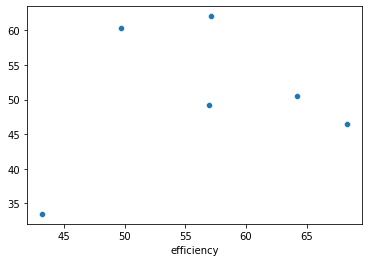

In [34]:
sns.scatterplot(y_test, predictions)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='efficiency'>

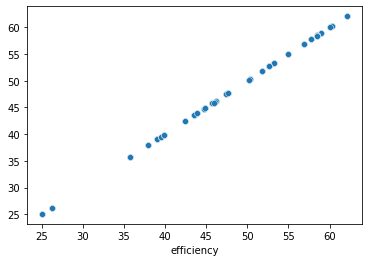

In [35]:
sns.scatterplot(y_train, train_preds)